In [ ]:
!pip install opencv-python pandas matplotlib


In [28]:
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
import os
import cv2
import pandas as pd

def analyze_images(root_dir):

    data = []
    # pterate over each  category
    for dirpath, dirnames, filenames in os.walk(root_dir):
        # print a message when a new category is started 
        # To Fix: prints root folder name as a category
        print(f"Processing category: {os.path.basename(dirpath)}")
        
        # iterate over each file in the current category
        for file in filenames:
            # check if the file is an image
            if file.endswith(('.png', '.jpg', '.jpeg')):

                file_path = os.path.join(dirpath, file)
                img = cv2.imread(file_path)
                # null check
                if img is not None:
                    # get heignt and width
                    height, width, _ = img.shape
                    category = os.path.basename(dirpath)
                    relative_path = os.path.relpath(file_path, root_dir)
                    file_size = os.path.getsize(file_path)

                    if width > height:
                        orientation = 'Landscape'
                    else:
                        orientation = 'Portrait'
                        
                    data.append({
                        'Image Name': file,
                        'Category': category,
                        'File Path': relative_path,
                        'Width': width,
                        'Height': height,
                        'File Size': file_size,
                        'Orientation': orientation
                    })
    return pd.DataFrame(data)


In [34]:
import matplotlib.pyplot as plt

def plot_dimensions(df):
    plt.figure(figsize=(15,  10))

    # graph width
    plt.subplot(2,  2,  1)
    df['Width'].plot(kind='hist', bins=50, color='blue', alpha=0.7)
    plt.title('Width Distribution')
    plt.xlabel('Width')
    plt.ylabel('Frequency')
    
    # graph height
    plt.subplot(2,  2,  2)
    df['Height'].plot(kind='hist', bins=50, color='green', alpha=0.7)
    plt.title('Height Distribution')
    plt.xlabel('Height')
    plt.ylabel('Frequency')
    
    # width vs height
    plt.subplot(2,  2,  3)
    plt.scatter(df['Width'], df['Height'], alpha=0.5, color='orange')
    plt.title('Width vs Height')
    plt.xlabel('Width')
    plt.ylabel('Height')
    
    plt.tight_layout()
    plt.show()


Processing category: Images
Processing category: airport_inside
Processing category: artstudio
Processing category: auditorium
Processing category: bakery
Processing category: bar
Processing category: bathroom
Processing category: bedroom
Processing category: bookstore
Processing category: bowling
Processing category: buffet
Processing category: casino
Processing category: children_room
Processing category: church_inside
Processing category: classroom
Processing category: cloister
Processing category: closet
Processing category: clothingstore
Processing category: computerroom
Processing category: concert_hall
Processing category: corridor
Processing category: deli
Processing category: dentaloffice
Processing category: dining_room
Processing category: elevator
Processing category: fastfood_restaurant
Processing category: florist
Processing category: gameroom
Processing category: garage
Processing category: greenhouse
Processing category: grocerystore
Processing category: gym
Processing 

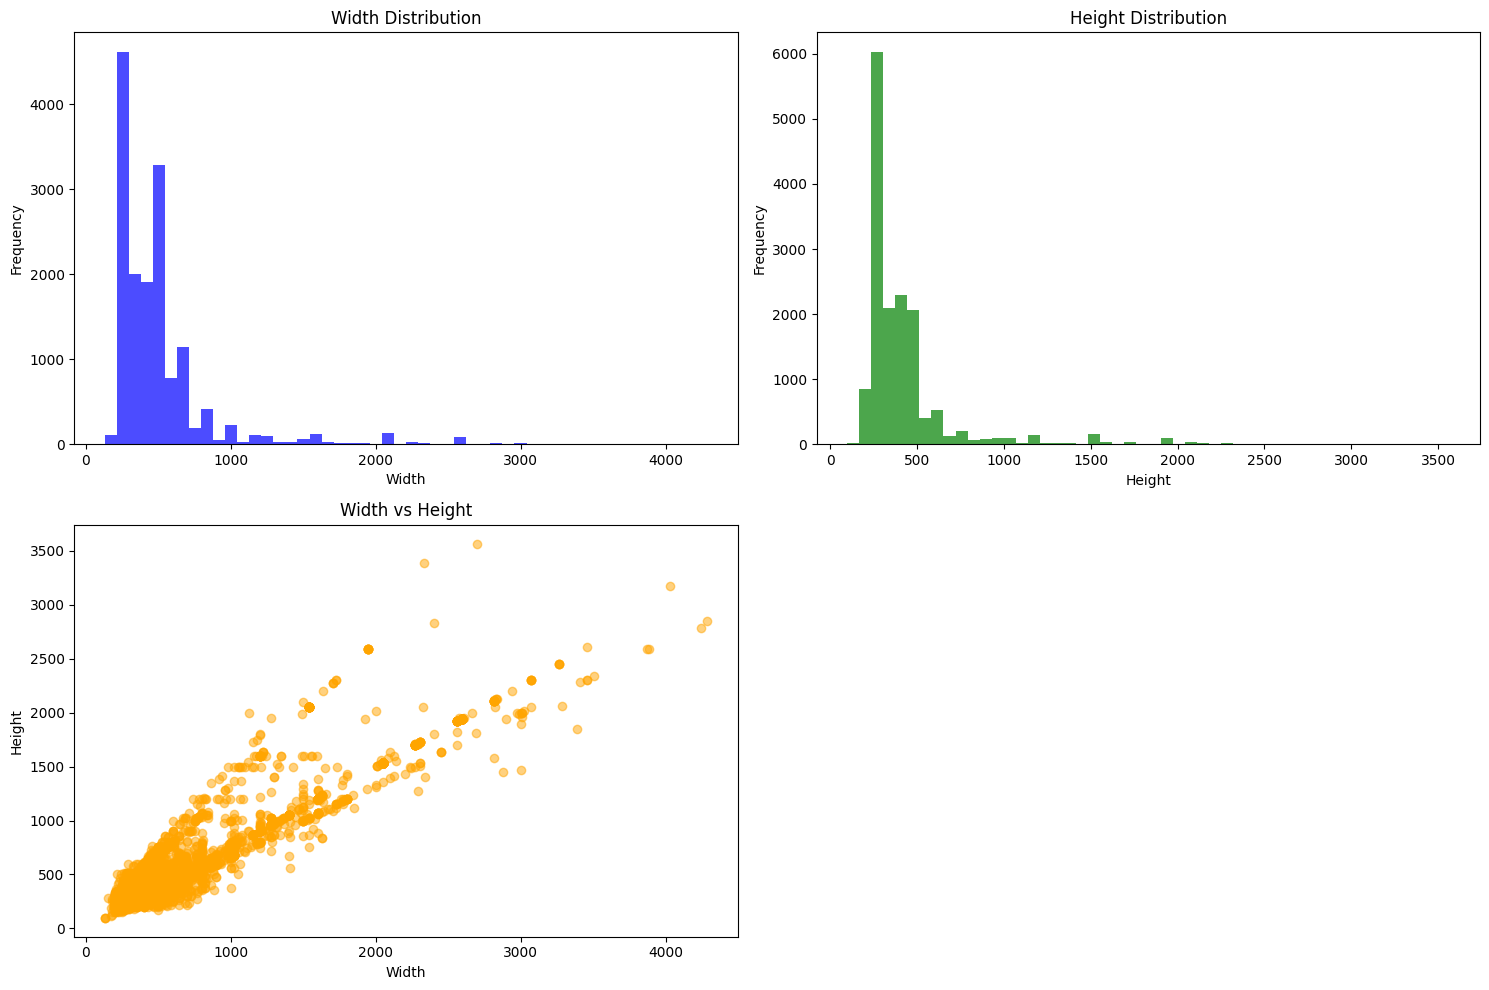

In [35]:
def main():
    # Adjust the root_dir to the relative path from your .ipynb file to the main folder
    root_dir = 'Data\\archive\\indoorCVPR_09\\Images'
    df = analyze_images(root_dir)
    
    # Save the DataFrame to a CSV file
    df.to_csv('image_dimensions.csv', index=False)
    
    # Plot the dimensions
    plot_dimensions(df)

if __name__ == "__main__":
    main()
